In [1]:
import pandas as pd

# Carga de datasets
df_base_clientes = pd.read_csv('../../../dataset/base_clientes.csv', sep=',')
df_base_consumos = pd.read_csv('../../../dataset/base_consumos.csv', sep=',')
df_base_saldos_creditos = pd.read_csv('../../../dataset/base_saldos_creditos.csv', sep=',')
df_base_saldos_cuentas = pd.read_csv('../../../dataset/base_saldos_cuentas.csv', sep=',')
df_universo = pd.read_csv('../../../dataset/universo.csv', sep=',')

# Verificación rápida
print("Datasets cargados correctamente:")
print(f"base_clientes → {df_base_clientes.shape}")
print(f"base_consumos → {df_base_consumos.shape}")
print(f"base_saldos_creditos → {df_base_saldos_creditos.shape}")
print(f"base_saldos_cuentas → {df_base_saldos_cuentas.shape}")
print(f"universo → {df_universo.shape}")


Datasets cargados correctamente:
base_clientes → (809579, 14)
base_consumos → (3697738, 7)
base_saldos_creditos → (11597785, 8)
base_saldos_cuentas → (8876560, 5)
universo → (535943, 3)


Primero vamos a tomar la base_clientes

In [2]:
print("hello")

hello


## base_clientes

In [3]:
df_base_clientes.head()

,ID,edad,ingreso,anios_exp,tipo_empleo,buro_de_credito,pago_nomina,tc,prest_per,prest_veh_hip,cuenta_ahorro,ofer_prest_per,ofer_tc,ofer_compra_deuda
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No
1,5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926...,4.6903,3.9570,0.0,type_7,category_9,0.0000,No,No,No,Yes,No,No,No
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0,type_7,category_5,0.0000,No,No,No,Yes,No,No,No
3,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0,type_7,category_3,0.0000,Yes,Yes,Yes,Yes,No,No,No
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0,type_7,category_5,0.0000,Yes,No,No,Yes,No,No,No


In [4]:
df_base_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809579 entries, 0 to 809578
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 809579 non-null  object 
 1   edad               809579 non-null  float64
 2   ingreso            809579 non-null  float64
 3   anios_exp          809579 non-null  float64
 4   tipo_empleo        809579 non-null  object 
 5   buro_de_credito    809579 non-null  object 
 6   pago_nomina        809579 non-null  float64
 7   tc                 809579 non-null  object 
 8   prest_per          809579 non-null  object 
 9   prest_veh_hip      809579 non-null  object 
 10  cuenta_ahorro      809579 non-null  object 
 11  ofer_prest_per     809579 non-null  object 
 12  ofer_tc            809579 non-null  object 
 13  ofer_compra_deuda  809579 non-null  object 
dtypes: float64(4), object(10)
memory usage: 86.5+ MB


In [5]:
df_base_clientes.describe()

,edad,ingreso,anios_exp,pago_nomina
count,809579.000000,809579.000000,809579.000000,809579.000000
mean,4.275201,4.284237,1.333632,1.417533
std,0.377544,0.477204,1.946502,2.017392
min,0.000000,0.000000,0.000000,0.000000
25%,4.001100,4.098200,0.000000,0.000000
50%,4.266700,4.286900,0.000000,0.000000
75%,4.549500,4.509800,3.619300,3.973700
max,5.000000,5.000000,5.000000,5.000000


In [6]:
df_base_clientes.duplicated().sum() 

np.int64(0)

Creación de nuevas variables derivadas [der_var1_var2]

In [7]:
df_base_clientes['der_ingreso_por_anio_exp'] = df_base_clientes['ingreso'] / (df_base_clientes['anios_exp'] + 1)
df_base_clientes['der_edad_laboral_relativa'] = df_base_clientes['anios_exp'] / (df_base_clientes['edad'] + 1)
df_base_clientes['der_edad_ingreso_relativa'] = df_base_clientes['ingreso'] / (df_base_clientes['edad'] + 1)
df_base_clientes['der_edad_anios_exp'] = df_base_clientes['edad'] / (df_base_clientes['anios_exp'] + 1)
df_base_clientes['der_ingreso_edad_exp'] = df_base_clientes['ingreso'] / ((df_base_clientes['edad'] + 1) * (df_base_clientes['anios_exp'] + 1))


Creación de variables agregadas

In [ ]:
import numpy as np
import pandas as pd

# Identificar columnas numéricas
numeric_cols = df_base_clientes.select_dtypes(include=[np.number]).columns

# Crear transformaciones directamente en el mismo DataFrame
for col in numeric_cols:
    df_base_clientes[f'{col}_cuadrado'] = df_base_clientes[col] ** 2
    df_base_clientes[f'{col}_log'] = np.where(df_base_clientes[col] > 0, np.log(df_base_clientes[col]), np.nan)
    df_base_clientes[f'{col}_inv'] = np.where(df_base_clientes[col] != 0, 1 / df_base_clientes[col], np.nan)

# Mostrar confirmación
print("Transformaciones creadas en df_base_clientes:")
print([c for c in df_base_clientes.columns if any(suf in c for suf in ['_cuadrado', '_log', '_inv'])])


Concatenar tablas

In [8]:
import pandas as pd

# Asegúrate de tener una columna común para hacer el join, por ejemplo 'ID'
# (ajusta 'ID' si el nombre de la llave es diferente)

# 1️⃣ Renombrar las columnas de df_base_clientes (excepto la llave)
df_base_clientes_prefixed = df_base_clientes.rename(
    columns={col: f"DB_CLI_{col}" for col in df_base_clientes.columns if col != 'ID'}
)

# 2️⃣ Realizar el LEFT JOIN con df_universo
df_universo = df_universo.merge(
    df_base_clientes_prefixed,
    on='ID',
    how='left'
)

# 3️⃣ Verificación
print(df_universo.shape)
df_universo.head()


(535943, 21)


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_CLI_prest_veh_hip,DB_CLI_cuenta_ahorro,DB_CLI_ofer_prest_per,DB_CLI_ofer_tc,DB_CLI_ofer_compra_deuda,DB_CLI_der_ingreso_por_anio_exp,DB_CLI_der_edad_laboral_relativa,DB_CLI_der_edad_ingreso_relativa,DB_CLI_der_edad_anios_exp,DB_CLI_der_ingreso_edad_exp
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.000,type_2,category_6,0.0,No,...,No,Yes,No,No,No,4.652700,0.000000,0.959359,3.849800,0.959359
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.274,type_3,category_4,0.0,No,...,No,Yes,No,No,No,0.804835,0.770423,0.765142,0.862268,0.145078
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5,4.3600,4.2117,0.000,type_2,category_9,0.0,No,...,No,Yes,No,No,No,4.211700,0.000000,0.785765,4.360000,0.785765
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.000,type_7,category_2,0.0,No,...,No,Yes,Yes,Yes,No,4.158400,0.000000,0.771302,4.391400,0.771302
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5,4.3077,4.3285,0.000,type_2,category_6,0.0,No,...,No,Yes,No,No,No,4.328500,0.000000,0.815513,4.307700,0.815513


---

## df_base_saldos_cuentas

In [9]:
df_base_saldos_cuentas.head()

,mes,ID,saldo_ahorros,saldo_otros,periodo
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5...,4.1900,0.0,period_5
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf91...,4.4621,0.0,period_5
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212a...,4.2878,0.0,period_5
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0,period_5
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d6288...,3.8922,0.0,period_5


In [10]:
df_base_saldos_cuentas.head()

,mes,ID,saldo_ahorros,saldo_otros,periodo
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5...,4.1900,0.0,period_5
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf91...,4.4621,0.0,period_5
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212a...,4.2878,0.0,period_5
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0,period_5
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d6288...,3.8922,0.0,period_5


In [11]:
df_base_saldos_cuentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876560 entries, 0 to 8876559
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mes            int64  
 1   ID             object 
 2   saldo_ahorros  float64
 3   saldo_otros    float64
 4   periodo        object 
dtypes: float64(2), int64(1), object(2)
memory usage: 338.6+ MB


In [12]:
df_base_saldos_cuentas.describe()

,mes,saldo_ahorros,saldo_otros
count,8.876560e+06,8.876560e+06,8.876560e+06
mean,6.632422e+00,3.140673e+00,6.191672e-01
std,3.448429e+00,1.207045e+00,1.405347e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.644100e+00,0.000000e+00
50%,7.000000e+00,3.318500e+00,0.000000e+00
75%,1.000000e+01,3.986700e+00,0.000000e+00
max,1.200000e+01,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [13]:
import pandas as pd

# Asegurar orden correcto por mes
df_base_saldos_cuentas = df_base_saldos_cuentas.sort_values(by=['ID', 'mes'], ascending=[True, False])

# -----------------------------
# Agregados de los últimos 2 meses
# -----------------------------
df_dos_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11])]
    .groupby('ID')
    .agg(
        dos_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        dos_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        dos_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        dos_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 3 meses
# -----------------------------
df_tres_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10])]
    .groupby('ID')
    .agg(
        tres_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        tres_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        tres_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        tres_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 4 meses
# -----------------------------
df_cuatro_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9])]
    .groupby('ID')
    .agg(
        cuatro_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        cuatro_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        cuatro_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        cuatro_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 5 meses
# -----------------------------
df_cinco_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8])]
    .groupby('ID')
    .agg(
        cinco_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        cinco_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        cinco_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        cinco_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 6 meses
# -----------------------------
df_seis_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8, 7])]
    .groupby('ID')
    .agg(
        seis_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        seis_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        seis_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        seis_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 7 meses
# -----------------------------
df_siete_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8, 7, 6])]
    .groupby('ID')
    .agg(
        siete_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        siete_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        siete_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        siete_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)



# -----------------------------
# Agregados de los últimos 8 meses
# -----------------------------
df_ocho_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8, 7, 6, 5])]
    .groupby('ID')
    .agg(
        ocho_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        ocho_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        ocho_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        ocho_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 9 meses
# -----------------------------
df_nueve_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8, 7, 6, 5, 4])]
    .groupby('ID')
    .agg(
        nueve_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        nueve_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        nueve_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        nueve_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 10 meses
# -----------------------------
df_diez_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8, 7, 6, 5, 4, 3])]
    .groupby('ID')
    .agg(
        diez_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        diez_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        diez_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        diez_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 11 meses
# -----------------------------
df_once_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2])]
    .groupby('ID')
    .agg(
        once_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        once_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        once_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        once_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 12 meses
# -----------------------------
df_doce_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])]
    .groupby('ID')
    .agg(
        doce_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        doce_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        doce_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        doce_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Unir todos los resultados
# -----------------------------
df_agregados_base_saldos_cuentas = (
    df_dos_meses
    .merge(df_tres_meses, on='ID', how='outer')
    .merge(df_cuatro_meses, on='ID', how='outer')
    .merge(df_cinco_meses, on='ID', how='outer')
    .merge(df_seis_meses, on='ID', how='outer')
    .merge(df_siete_meses, on='ID', how='outer')
    .merge(df_ocho_meses, on='ID', how='outer')
    .merge(df_nueve_meses, on='ID', how='outer')
    .merge(df_diez_meses, on='ID', how='outer')
    .merge(df_once_meses, on='ID', how='outer')
    .merge(df_doce_meses, on='ID', how='outer')
)

# Verificar resultado
print(df_agregados_base_saldos_cuentas.shape)
df_agregados_base_saldos_cuentas.head()


(790580, 45)


,ID,dos_meses_max_saldo_ahorros,dos_meses_min_saldo_ahorros,dos_meses_sum_saldo_ahorros,dos_meses_prom_saldo_ahorros,tres_meses_max_saldo_ahorros,tres_meses_min_saldo_ahorros,tres_meses_sum_saldo_ahorros,tres_meses_prom_saldo_ahorros,cuatro_meses_max_saldo_ahorros,...,diez_meses_sum_saldo_ahorros,diez_meses_prom_saldo_ahorros,once_meses_max_saldo_ahorros,once_meses_min_saldo_ahorros,once_meses_sum_saldo_ahorros,once_meses_prom_saldo_ahorros,doce_meses_max_saldo_ahorros,doce_meses_min_saldo_ahorros,doce_meses_sum_saldo_ahorros,doce_meses_prom_saldo_ahorros
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,2.0478,1.9315,3.9793,1.98965,3.2484,1.9315,7.2277,2.409233,3.4815,...,15.7029,1.57029,3.4815,0.4939,16.2953,1.481391,3.4815,0.4939,16.8877,1.407308
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,3.5701,2.7086,6.2787,3.13935,3.5701,2.7086,9.1865,3.062167,3.5701,...,33.4863,3.34863,3.9980,2.6010,36.0873,3.280664,3.9980,2.3428,38.4301,3.202508
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,3.9865,3.9865,7.9730,3.98650,3.9865,3.9865,11.9595,3.986500,3.9865,...,39.8650,3.98650,3.9865,3.9865,43.8515,3.986500,3.9865,3.9865,47.8380,3.986500
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,4.0610,4.0464,8.1074,4.05370,4.0791,4.0464,12.1865,4.062167,4.0946,...,42.1374,4.21374,4.3968,4.0464,46.4952,4.226836,4.3968,4.0464,50.7124,4.226033
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,3.9150,2.8720,6.7870,3.39350,3.9150,2.8720,9.6760,3.225333,3.9150,...,27.7544,2.77544,3.9150,2.0286,30.7387,2.794427,3.9150,2.0286,33.7255,2.810458


In [ ]:
import numpy as np
import pandas as pd

# Identificar columnas numéricas
numeric_cols = df_agregados_base_saldos_cuentas.select_dtypes(include=[np.number]).columns

# Crear transformaciones directamente en el mismo DataFrame
for col in numeric_cols:
    df_agregados_base_saldos_cuentas[f'{col}_cuadrado'] = df_agregados_base_saldos_cuentas[col] ** 2
    df_agregados_base_saldos_cuentas[f'{col}_log'] = np.where(df_agregados_base_saldos_cuentas[col] > 0, np.log(df_agregados_base_saldos_cuentas[col]), np.nan)
    df_agregados_base_saldos_cuentas[f'{col}_inv'] = np.where(df_agregados_base_saldos_cuentas[col] != 0, 1 / df_agregados_base_saldos_cuentas[col], np.nan)

# Mostrar confirmación
print("Transformaciones creadas en df_agregados_base_saldos_cuentas:")
print([c for c in df_agregados_base_saldos_cuentas.columns if any(suf in c for suf in ['_cuadrado', '_log', '_inv'])])


Concatenar tablas

In [14]:
# 1️⃣ Renombrar columnas de df_base_saldos_cuentas (excepto la llave 'ID')
df_base_saldos_cuentas_prefixed = df_agregados_base_saldos_cuentas.rename(
    columns={col: f"DB_SAL_CUE_{col}" for col in df_agregados_base_saldos_cuentas.columns if col != 'ID'}
)

# 2️⃣ Hacer el LEFT JOIN con df_universo
df_universo = df_universo.merge(
    df_base_saldos_cuentas_prefixed,
    on='ID',
    how='left'
)

# 3️⃣ Verificación
print(df_universo.shape)
df_universo.head()


(535943, 65)


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_SAL_CUE_diez_meses_sum_saldo_ahorros,DB_SAL_CUE_diez_meses_prom_saldo_ahorros,DB_SAL_CUE_once_meses_max_saldo_ahorros,DB_SAL_CUE_once_meses_min_saldo_ahorros,DB_SAL_CUE_once_meses_sum_saldo_ahorros,DB_SAL_CUE_once_meses_prom_saldo_ahorros,DB_SAL_CUE_doce_meses_max_saldo_ahorros,DB_SAL_CUE_doce_meses_min_saldo_ahorros,DB_SAL_CUE_doce_meses_sum_saldo_ahorros,DB_SAL_CUE_doce_meses_prom_saldo_ahorros
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.000,type_2,category_6,0.0,No,...,31.4119,3.14119,4.0061,2.5149,35.4180,3.219818,4.1174,2.5149,39.5354,3.294617
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.274,type_3,category_4,0.0,No,...,33.4547,3.34547,3.5592,3.2254,37.0139,3.364900,3.5592,3.2254,40.5731,3.381092
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5,4.3600,4.2117,0.000,type_2,category_9,0.0,No,...,34.3209,3.43209,3.9182,2.7090,38.2386,3.476236,3.9182,2.7090,42.1470,3.512250
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.000,type_7,category_2,0.0,No,...,38.4982,3.84982,4.0929,3.7511,42.5910,3.871909,4.0929,3.7511,46.6400,3.886667
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5,4.3077,4.3285,0.000,type_2,category_6,0.0,No,...,29.9530,2.99530,3.4086,2.6043,32.5573,2.959755,3.4086,2.6043,35.3925,2.949375


In [15]:
nulos_por_columna = df_universo.isnull().sum()
nulos_por_columna

ID                                              0
target                                          0
periodo                                         0
DB_CLI_edad                                     0
DB_CLI_ingreso                                  0
                                            ...  
DB_SAL_CUE_once_meses_prom_saldo_ahorros    12461
DB_SAL_CUE_doce_meses_max_saldo_ahorros     12297
DB_SAL_CUE_doce_meses_min_saldo_ahorros     12297
DB_SAL_CUE_doce_meses_sum_saldo_ahorros     12297
DB_SAL_CUE_doce_meses_prom_saldo_ahorros    12297
Length: 65, dtype: int64

___

## df_base_saldos_creditos

In [16]:
df_base_saldos_creditos.head()

,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5


In [17]:
df_base_saldos_creditos = df_base_saldos_creditos.merge(
    df_universo[['ID', 'target']],  # seleccionamos ID y target
    on='ID',                        # columna en común para hacer el join
    how='left'                       # tipo de join
)

df_base_saldos_creditos.head()


,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo,target
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5,0.0
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5,0.0
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5,1.0
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5,0.0
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5,1.0


In [19]:
df_base_saldos_creditos.head()

,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo,target,monto_log,monto_sqrt,monto_cuadrado
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5,0.0,1.482763,1.845291,11.594706
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5,0.0,1.481673,1.843990,11.562040
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5,1.0,1.400986,1.749057,9.358705
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5,0.0,1.335343,1.673708,7.847282
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5,1.0,1.382537,1.727715,8.910225


No usar tipo_credito

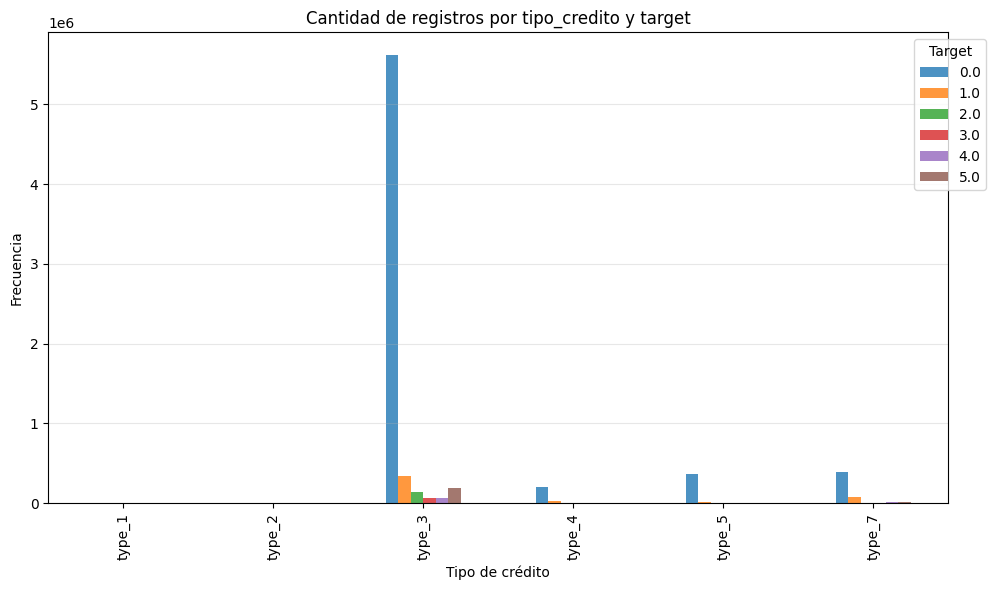

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'tipo_credito'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_credito'])

# Creamos una tabla de contingencia tipo_credito vs target
contingency = pd.crosstab(df_plot['tipo_credito'], df_plot['target'])

# Graficamos
contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)

plt.title('Cantidad de registros por tipo_credito y target')
plt.xlabel('Tipo de crédito')
plt.ylabel('Frecuencia')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target', 'tipo_credito' o 'periodo'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_credito', 'periodo'])

# Obtenemos los periodos únicos
periodos = df_plot['periodo'].unique()

# # Creamos un histograma para cada periodo
# for p in periodos:
#     df_periodo = df_plot[df_plot['periodo'] == p]
    
#     # Tabla de contingencia tipo_credito vs target
#     contingency = pd.crosstab(df_periodo['tipo_credito'], df_periodo['target'])
    
#     # Graficamos
#     ax = contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)
    
#     plt.title(f'Cantidad de registros por tipo_credito y target - Periodo {p}')
#     plt.xlabel('Tipo de crédito')
#     plt.ylabel('Frecuencia')
#     plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
#     plt.grid(axis='y', alpha=0.3)
#     plt.tight_layout()
#     plt.show()


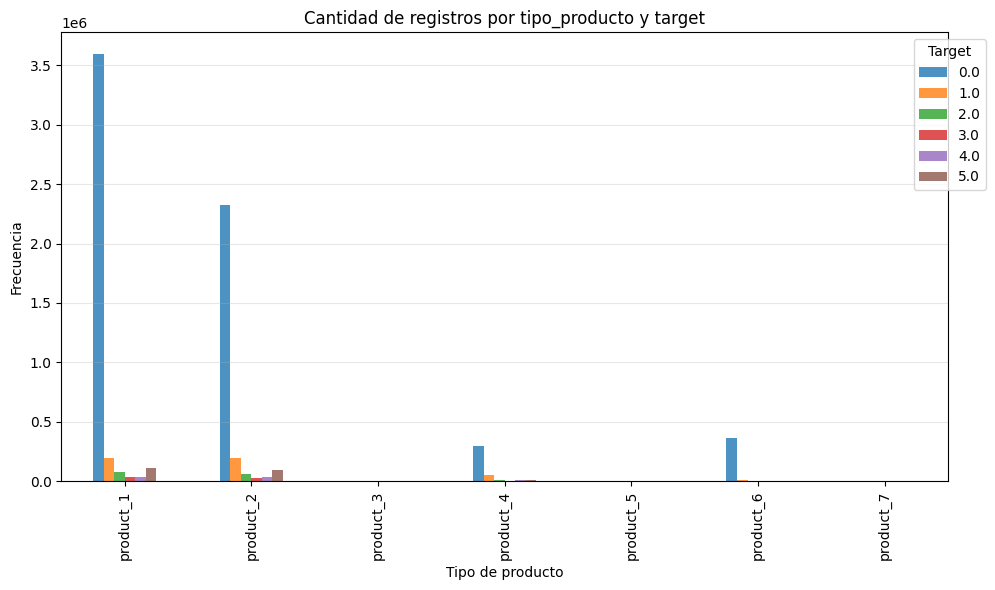

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'tipo_producto'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_producto'])

# Creamos una tabla de contingencia tipo_producto vs target
contingency = pd.crosstab(df_plot['tipo_producto'], df_plot['target'])

# Graficamos
contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)

plt.title('Cantidad de registros por tipo_producto y target')
plt.xlabel('Tipo de producto')
plt.ylabel('Frecuencia')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target', 'tipo_producto' o 'periodo'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_producto', 'periodo'])

# Obtenemos los periodos únicos
periodos = df_plot['periodo'].unique()

# Creamos un histograma para cada periodo
# for p in periodos:
#     df_periodo = df_plot[df_plot['periodo'] == p]
    
#     # Tabla de contingencia tipo_producto vs target
#     contingency = pd.crosstab(df_periodo['tipo_producto'], df_periodo['target'])
    
#     # Graficamos
#     ax = contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)
    
#     plt.title(f'Cantidad de registros por tipo_producto y target - Periodo {p}')
#     plt.xlabel('Tipo de producto')
#     plt.ylabel('Frecuencia')
#     plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
#     plt.grid(axis='y', alpha=0.3)
#     plt.tight_layout()
#     plt.show()


No usar inst_fin

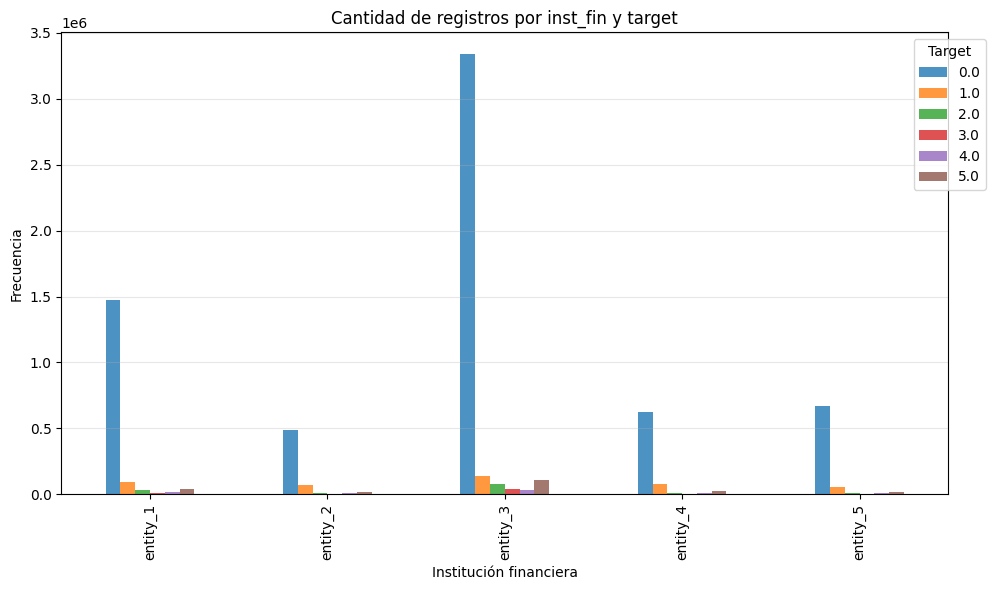

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'inst_fin'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'inst_fin'])

# Creamos una tabla de contingencia inst_fin vs target
contingency = pd.crosstab(df_plot['inst_fin'], df_plot['target'])

# Graficamos
contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)

plt.title('Cantidad de registros por inst_fin y target')
plt.xlabel('Institución financiera')
plt.ylabel('Frecuencia')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


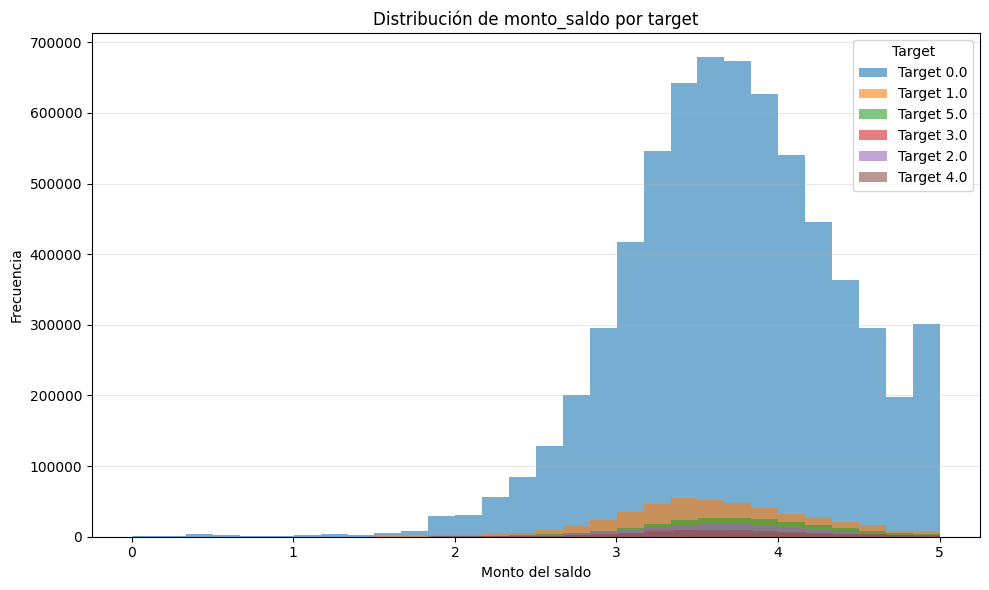

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'monto_saldo'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'monto_saldo'])

# Obtenemos los valores únicos de target
target_values = df_plot['target'].unique()

plt.figure(figsize=(10,6))

# Graficamos un histograma por cada target
for target in target_values:
    subset = df_plot[df_plot['target'] == target]
    plt.hist(subset['monto_saldo'], bins=30, alpha=0.6, label=f'Target {target}')

plt.title('Distribución de monto_saldo por target')
plt.xlabel('Monto del saldo')
plt.ylabel('Frecuencia')
plt.legend(title='Target')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


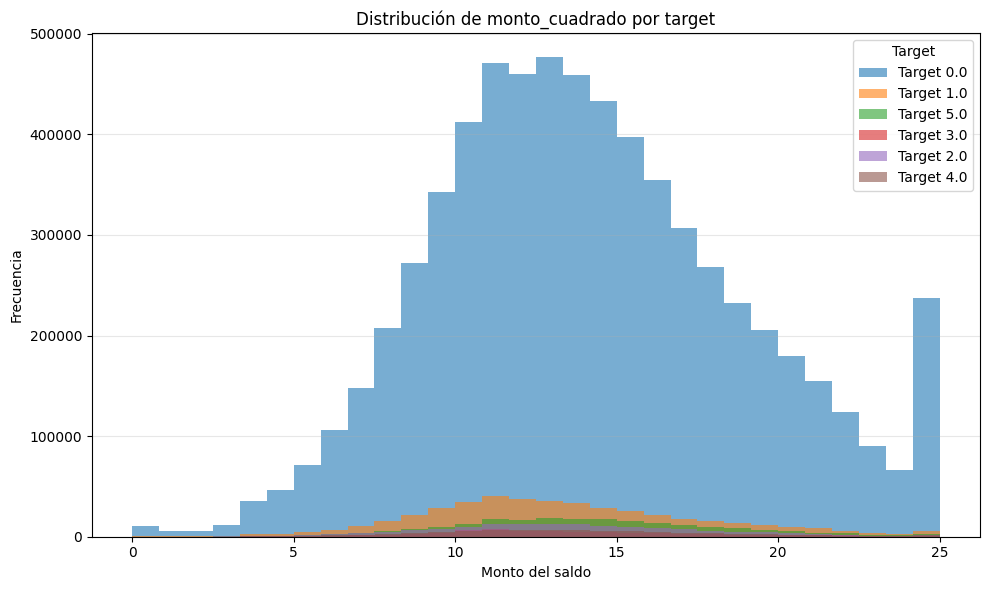

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'monto_saldo'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'monto_cuadrado'])

# Obtenemos los valores únicos de target
target_values = df_plot['target'].unique()

plt.figure(figsize=(10,6))

for target in target_values:
    subset = df_plot[df_plot['target'] == target]
    plt.hist(subset['monto_cuadrado'], bins=30, alpha=0.6, label=f'Target {target}')

plt.title('Distribución de monto_cuadrado por target')
plt.xlabel('Monto del saldo')
plt.ylabel('Frecuencia')
plt.legend(title='Target')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


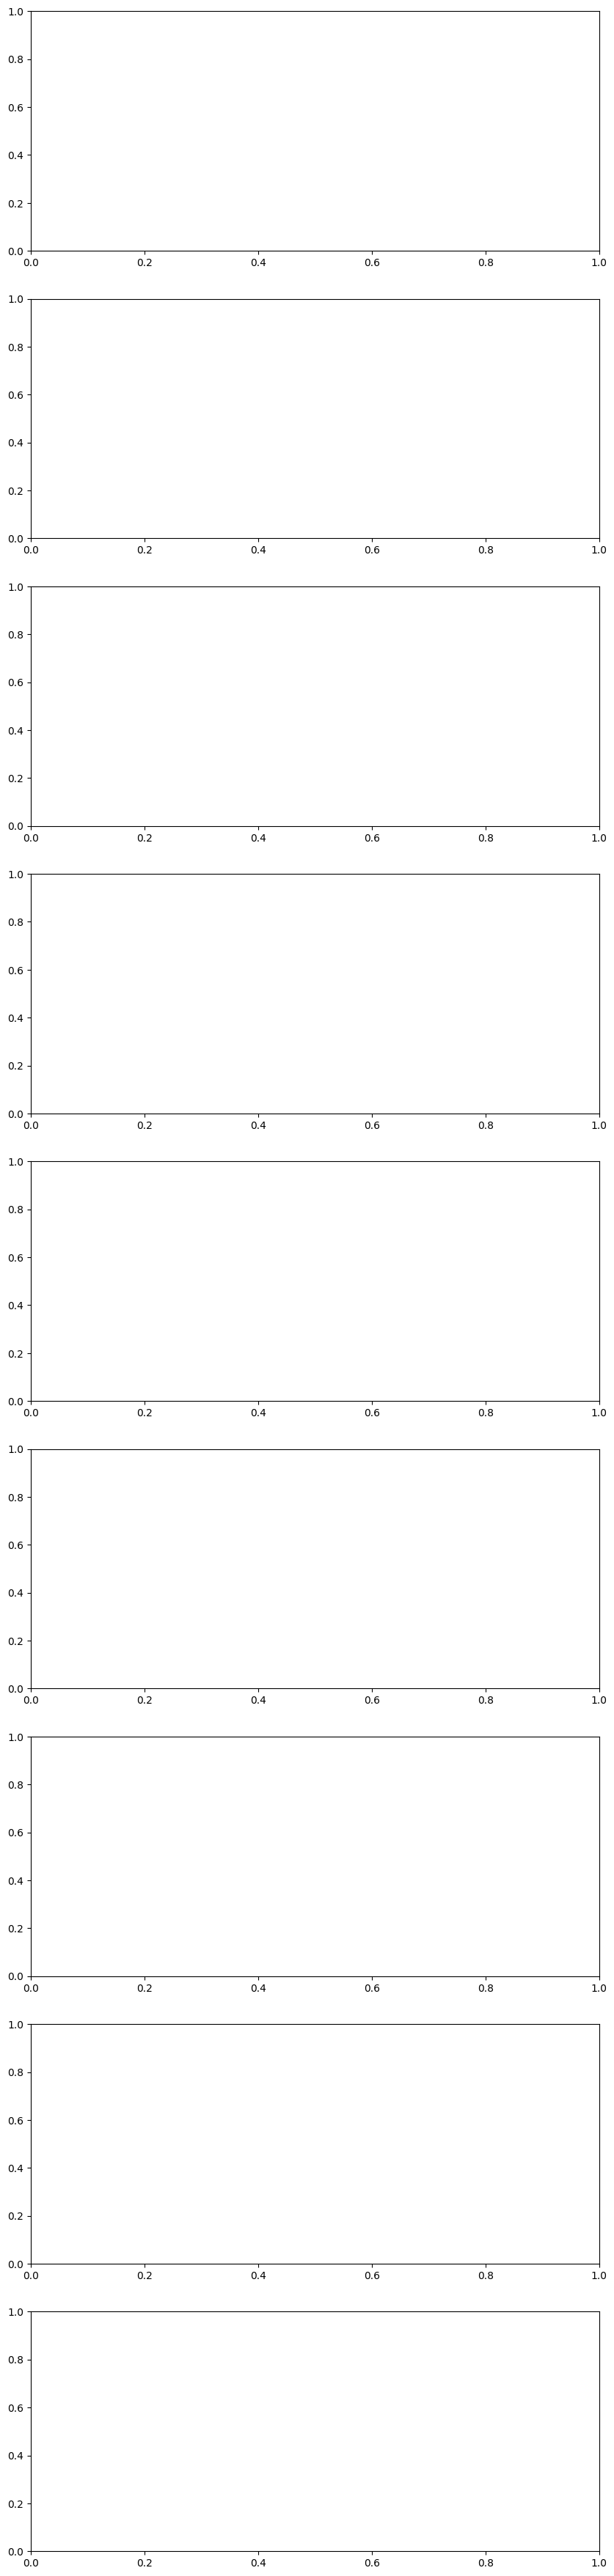

In [27]:
import matplotlib.pyplot as plt

# Obtener los valores únicos de tipo_credito y asignarles colores fijos
tipos_credito = df_base_saldos_creditos['tipo_credito'].unique()
colores = plt.cm.tab10.colors  # paleta con 10 colores
color_map = {tipo: colores[i % len(colores)] for i, tipo in enumerate(tipos_credito)}

# Obtener los valores únicos de periodo
periodos = df_base_saldos_creditos['periodo'].unique()

# Crear una figura con un histograma por periodo
fig, axes = plt.subplots(nrows=len(periodos), ncols=1, figsize=(10, 5 * len(periodos)))

# Si solo hay un periodo, evitar error de indexación
if len(periodos) == 1:
    axes = [axes]

# # Recorrer cada periodo y graficar
# for ax, periodo in zip(axes, periodos):
#     subset = df_base_saldos_creditos[df_base_saldos_creditos['periodo'] == periodo]
    
#     for tipo in tipos_credito:  # usar los mismos tipos y colores en todos los subplots
#         tipo_subset = subset[subset['tipo_credito'] == tipo]
#         if not tipo_subset.empty:
#             ax.hist(
#                 tipo_subset['monto_saldo'],
#                 bins=30,
#                 alpha=0.6,
#                 color=color_map[tipo],
#                 label=f'{tipo}'
#             )
    
#     ax.set_title(f'Distribución de monto_saldo - Periodo: {periodo}', fontsize=14)
#     ax.set_xlabel('Monto del saldo')
#     ax.set_ylabel('Frecuencia')
#     ax.legend(title='Tipo de crédito')
#     ax.grid(axis='y', alpha=0.4)

# plt.tight_layout()
# plt.show()


In [28]:
df_base_saldos_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11597785 entries, 0 to 11597784
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   mes             int64  
 1   ID              object 
 2   tipo_credito    object 
 3   tipo_producto   object 
 4   inst_fin        object 
 5   monto_saldo     float64
 6   dias_atraso     float64
 7   periodo         object 
 8   target          float64
 9   monto_log       float64
 10  monto_sqrt      float64
 11  monto_cuadrado  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.0+ GB


In [29]:
df_base_saldos_creditos.describe()

,mes,monto_saldo,dias_atraso,target,monto_log,monto_sqrt,monto_cuadrado
count,1.159778e+07,1.159778e+07,1.159778e+07,7.569171e+06,1.159778e+07,1.159778e+07,1.159778e+07
mean,6.673574e+00,3.703500e+00,1.877785e-01,3.178973e-01,1.537982e+00,1.916360e+00,1.413660e+01
std,3.449925e+00,6.486027e-01,8.981397e-01,1.013715e+00,1.478829e-01,1.762477e-01,4.708254e+00
min,1.000000e+00,3.000000e-03,0.000000e+00,0.000000e+00,2.995509e-03,5.477226e-02,9.000000e-06
25%,4.000000e+00,3.292100e+00,0.000000e+00,0.000000e+00,1.456776e+00,1.814415e+00,1.083792e+01
50%,7.000000e+00,3.703600e+00,0.000000e+00,0.000000e+00,1.548328e+00,1.924474e+00,1.371665e+01
75%,1.000000e+01,4.142900e+00,0.000000e+00,0.000000e+00,1.637617e+00,2.035412e+00,1.716362e+01
max,1.200000e+01,5.000000e+00,5.000000e+00,5.000000e+00,1.791759e+00,2.236068e+00,2.500000e+01


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [30]:
import pandas as pd

# Asegurar orden correcto por mes
df_base_saldos_creditos = df_base_saldos_creditos.sort_values(by=['ID', 'mes'], ascending=[True, False])

# -----------------------------
# Agregados de los últimos 2 meses (mes 12 y 11)
# -----------------------------
df_dos_meses = (
    df_base_saldos_creditos[df_base_saldos_creditos['mes'].isin([12, 11])]
    .groupby('ID')
    .agg(
        dos_meses_max_monto_saldo=('monto_saldo', 'max'),
        dos_meses_min_monto_saldo=('monto_saldo', 'min'),
        dos_meses_sum_monto_saldo=('monto_saldo', 'sum'),
        dos_meses_prom_monto_saldo=('monto_saldo', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 3 meses (mes 12, 11 y 10)
# -----------------------------
df_tres_meses = (
    df_base_saldos_creditos[df_base_saldos_creditos['mes'].isin([12, 11, 10])]
    .groupby('ID')
    .agg(
        tres_meses_max_monto_saldo=('monto_saldo', 'max'),
        tres_meses_min_monto_saldo=('monto_saldo', 'min'),
        tres_meses_sum_monto_saldo=('monto_saldo', 'sum'),
        tres_meses_prom_monto_saldo=('monto_saldo', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Unir ambos resultados
# -----------------------------
df_agregados_base_saldos_creditos = pd.merge(df_dos_meses, df_tres_meses, on='ID', how='outer')

# Verificar resultado
print(df_agregados_base_saldos_creditos.shape)
df_agregados_base_saldos_creditos.head()


(485195, 9)


,ID,dos_meses_max_monto_saldo,dos_meses_min_monto_saldo,dos_meses_sum_monto_saldo,dos_meses_prom_monto_saldo,tres_meses_max_monto_saldo,tres_meses_min_monto_saldo,tres_meses_sum_monto_saldo,tres_meses_prom_monto_saldo
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,3.1754,3.1754,6.3508,3.1754,3.2202,3.1754,9.5710,3.190333
1,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,4.1010,2.8456,36.1860,3.6186,4.1019,2.8456,53.9995,3.599967
2,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,3.9005,1.7495,16.4935,3.2987,3.9005,1.7495,26.3618,3.295225
3,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,4.9799,2.7285,23.7864,3.9644,4.9832,2.7285,35.8494,3.983267
4,0000bf7ea0097a88c482e99ab814e6c4c4495b5a35e520...,4.3670,2.7129,45.2352,3.7696,4.3791,2.7129,68.4433,3.802406


Concatenar tablas

In [31]:
import pandas as pd

# 1️⃣ Renombrar columnas del df_base (excepto la llave ID)
df_base_renamed = df_agregados_base_saldos_creditos.rename(
    columns={col: f"DB_SAL_CRE_{col}" for col in df_agregados_base_saldos_creditos.columns if col != 'ID'}
)

# 2️⃣ INNER JOIN: solo registros que coinciden
df_universo = df_universo.merge(
    df_base_renamed,
    on='ID',
    how='inner'
)

# 3️⃣ Verificación final
print("✅ Dimensiones finales:", df_universo.shape)
print(f"✅ Registros totales después del merge: {len(df_universo)}")
df_universo.head()

✅ Dimensiones finales: (318667, 73)
✅ Registros totales después del merge: 318667


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_SAL_CUE_doce_meses_sum_saldo_ahorros,DB_SAL_CUE_doce_meses_prom_saldo_ahorros,DB_SAL_CRE_dos_meses_max_monto_saldo,DB_SAL_CRE_dos_meses_min_monto_saldo,DB_SAL_CRE_dos_meses_sum_monto_saldo,DB_SAL_CRE_dos_meses_prom_monto_saldo,DB_SAL_CRE_tres_meses_max_monto_saldo,DB_SAL_CRE_tres_meses_min_monto_saldo,DB_SAL_CRE_tres_meses_sum_monto_saldo,DB_SAL_CRE_tres_meses_prom_monto_saldo
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.0000,type_2,category_6,0.0000,No,...,39.5354,3.294617,3.8890,3.5872,7.4762,3.738100,3.8890,3.5872,11.0779,3.692633
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.2740,type_3,category_4,0.0000,No,...,40.5731,3.381092,4.5840,4.5657,9.1497,4.574850,4.5840,4.5298,13.6795,4.559833
2,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.0000,type_7,category_2,0.0000,No,...,46.6400,3.886667,3.2049,3.0596,6.2645,3.132250,3.2049,3.0596,6.2645,3.132250
3,56fe8d95f1af9103e92ce450ece54b4647ccb001a866e6...,1,period_5,4.1613,4.1732,0.0000,type_7,category_6,0.0000,No,...,33.5421,2.795175,3.9545,3.2072,10.4166,3.472200,3.9545,3.0691,13.4857,3.371425
4,f728012da429bb829188103c2cb56ef496a7b7e27360fd...,0,period_5,4.4027,4.3532,4.6727,type_2,category_2,3.6524,Yes,...,42.0036,3.500300,4.4323,3.8368,17.0093,4.252325,4.4323,3.8368,25.2907,4.215117


## df_base_consumos

In [32]:
df_base_consumos.head()

,periodo,ID,mes,compra_supermercado,compra_restaurante,compra_salud,compra_transporte
0,period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c...,12,0.0000,0.0000,0.0000,3.9437
1,period_9,0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2...,1,3.7397,3.3499,0.0000,0.0000
2,period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56...,4,3.6273,3.9726,3.6655,4.4131
3,period_9,8a583965c827c377690b816c90246eaedc499f03a5f25f...,8,3.7855,4.8286,5.0000,4.5094
4,period_9,e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f00675...,7,2.6077,3.9344,1.3229,3.8061


In [33]:
df_base_consumos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697738 entries, 0 to 3697737
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   periodo              object 
 1   ID                   object 
 2   mes                  int64  
 3   compra_supermercado  float64
 4   compra_restaurante   float64
 5   compra_salud         float64
 6   compra_transporte    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 197.5+ MB


In [34]:
df_base_consumos.describe()

,mes,compra_supermercado,compra_restaurante,compra_salud,compra_transporte
count,3.697738e+06,3.697738e+06,3.697738e+06,3.697738e+06,3.697738e+06
mean,6.735978e+00,2.035837e+00,2.505474e+00,1.517864e+00,1.539931e+00
std,3.450599e+00,1.849150e+00,1.734254e+00,1.820631e+00,1.875185e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,2.500800e+00,3.066600e+00,0.000000e+00,0.000000e+00
75%,1.000000e+01,3.703300e+00,3.872100e+00,3.313200e+00,3.458500e+00
max,1.200000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [35]:
import pandas as pd

# Asegurar orden correcto
df_base_consumos = df_base_consumos.sort_values(by=['ID', 'mes'], ascending=[True, False])

# -----------------------------
# Agregados de los últimos 2 meses (12 y 11)
# -----------------------------
df_dos_meses = (
    df_base_consumos[df_base_consumos['mes'].isin([12, 11])]
    .groupby('ID')
    .agg(
        dos_meses_max_compra_supermercado=('compra_supermercado', 'max'),
        dos_meses_min_compra_supermercado=('compra_supermercado', 'min'),
        dos_meses_sum_compra_supermercado=('compra_supermercado', 'sum'),
        dos_meses_prom_compra_supermercado=('compra_supermercado', 'mean'),

        dos_meses_max_compra_restaurante=('compra_restaurante', 'max'),
        dos_meses_min_compra_restaurante=('compra_restaurante', 'min'),
        dos_meses_sum_compra_restaurante=('compra_restaurante', 'sum'),
        dos_meses_prom_compra_restaurante=('compra_restaurante', 'mean'),

        dos_meses_max_compra_salud=('compra_salud', 'max'),
        dos_meses_min_compra_salud=('compra_salud', 'min'),
        dos_meses_sum_compra_salud=('compra_salud', 'sum'),
        dos_meses_prom_compra_salud=('compra_salud', 'mean'),

        dos_meses_max_compra_transporte=('compra_transporte', 'max'),
        dos_meses_min_compra_transporte=('compra_transporte', 'min'),
        dos_meses_sum_compra_transporte=('compra_transporte', 'sum'),
        dos_meses_prom_compra_transporte=('compra_transporte', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 3 meses (12, 11 y 10)
# -----------------------------
df_tres_meses = (
    df_base_consumos[df_base_consumos['mes'].isin([12, 11, 10])]
    .groupby('ID')
    .agg(
        tres_meses_max_compra_supermercado=('compra_supermercado', 'max'),
        tres_meses_min_compra_supermercado=('compra_supermercado', 'min'),
        tres_meses_sum_compra_supermercado=('compra_supermercado', 'sum'),
        tres_meses_prom_compra_supermercado=('compra_supermercado', 'mean'),

        tres_meses_max_compra_restaurante=('compra_restaurante', 'max'),
        tres_meses_min_compra_restaurante=('compra_restaurante', 'min'),
        tres_meses_sum_compra_restaurante=('compra_restaurante', 'sum'),
        tres_meses_prom_compra_restaurante=('compra_restaurante', 'mean'),

        tres_meses_max_compra_salud=('compra_salud', 'max'),
        tres_meses_min_compra_salud=('compra_salud', 'min'),
        tres_meses_sum_compra_salud=('compra_salud', 'sum'),
        tres_meses_prom_compra_salud=('compra_salud', 'mean'),

        tres_meses_max_compra_transporte=('compra_transporte', 'max'),
        tres_meses_min_compra_transporte=('compra_transporte', 'min'),
        tres_meses_sum_compra_transporte=('compra_transporte', 'sum'),
        tres_meses_prom_compra_transporte=('compra_transporte', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Unir ambos resultados
# -----------------------------
df_agregados_base_consumos = pd.merge(df_dos_meses, df_tres_meses, on='ID', how='outer')

# Verificar resultado
print(df_agregados_base_consumos.shape)
df_agregados_base_consumos.head()


(436740, 33)


,ID,dos_meses_max_compra_supermercado,dos_meses_min_compra_supermercado,dos_meses_sum_compra_supermercado,dos_meses_prom_compra_supermercado,dos_meses_max_compra_restaurante,dos_meses_min_compra_restaurante,dos_meses_sum_compra_restaurante,dos_meses_prom_compra_restaurante,dos_meses_max_compra_salud,...,tres_meses_sum_compra_restaurante,tres_meses_prom_compra_restaurante,tres_meses_max_compra_salud,tres_meses_min_compra_salud,tres_meses_sum_compra_salud,tres_meses_prom_compra_salud,tres_meses_max_compra_transporte,tres_meses_min_compra_transporte,tres_meses_sum_compra_transporte,tres_meses_prom_compra_transporte
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.00000,0.0,...,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,2.6134,2.6134,2.6134,2.6134
1,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.00000,1.9265,1.9265,1.9265,1.9265,2.8353,2.8353,2.8353,2.8353
2,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,5.0000,5.0000,5.0000,5.0000,0.0000,0.0,0.0000,0.00000,0.0,...,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,0.0000,0.0000,0.0000,0.0000,2.9725,0.0,2.9725,1.48625,0.0,...,2.9725,1.48625,0.0000,0.0000,0.0000,0.0000,2.8355,2.6781,5.5136,2.7568
4,0000c26c7932770cb1af1c74cb7e26da58622c7d835741...,2.7293,2.7293,2.7293,2.7293,0.0000,0.0,0.0000,0.00000,0.0,...,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Concatenar tablas

In [36]:
import pandas as pd

# 1️⃣ Renombrar columnas (excepto 'ID') para agregar prefijo
df_base_consumos_renamed = df_agregados_base_consumos.rename(
    columns={col: f"DB_CONS_{col}" for col in df_agregados_base_consumos.columns if col != 'ID'}
)

# 2️⃣ INNER JOIN con df_universo
df_universo = df_universo.merge(
    df_base_consumos_renamed,
    on='ID',
    how='inner'
)

# 3️⃣ Verificación final
print("✅ Dimensiones finales:", df_universo.shape)
print(f"✅ Registros totales después del merge: {len(df_universo)}")
df_universo.head()

✅ Dimensiones finales: (194903, 105)
✅ Registros totales después del merge: 194903


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_CONS_tres_meses_sum_compra_restaurante,DB_CONS_tres_meses_prom_compra_restaurante,DB_CONS_tres_meses_max_compra_salud,DB_CONS_tres_meses_min_compra_salud,DB_CONS_tres_meses_sum_compra_salud,DB_CONS_tres_meses_prom_compra_salud,DB_CONS_tres_meses_max_compra_transporte,DB_CONS_tres_meses_min_compra_transporte,DB_CONS_tres_meses_sum_compra_transporte,DB_CONS_tres_meses_prom_compra_transporte
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.0000,type_2,category_6,0.0000,No,...,0.0000,0.000000,3.2834,2.9529,6.2363,3.11815,0.0000,0.000,0.0000,0.0000
1,56fe8d95f1af9103e92ce450ece54b4647ccb001a866e6...,1,period_5,4.1613,4.1732,0.0000,type_7,category_6,0.0000,No,...,7.1692,2.389733,2.0268,0.0000,2.0268,0.67560,1.9083,0.000,1.9083,0.6361
2,a24b0f3338d73d81c1c281fbf77a517b2288924fdc30ba...,0,period_5,4.3364,5.0000,4.5489,type_2,category_2,4.8876,No,...,0.0000,0.000000,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000
3,413e595a556a13551bbcc4f164a2f2e63b0909decbd094...,0,period_5,3.8044,4.2393,0.0000,type_2,category_5,0.0000,Yes,...,3.6069,1.803450,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000
4,b0652801dc333a8a19e24eec35a783ce73f337673100c0...,0,period_5,4.6407,4.0411,0.0000,type_4,category_3,0.0000,No,...,0.0000,0.000000,0.0000,0.0000,0.0000,0.00000,4.0920,4.092,4.0920,4.0920


In [37]:
len(df_universo)

194903

In [38]:
df_universo.columns

Index(['ID', 'target', 'periodo', 'DB_CLI_edad', 'DB_CLI_ingreso',
       'DB_CLI_anios_exp', 'DB_CLI_tipo_empleo', 'DB_CLI_buro_de_credito',
       'DB_CLI_pago_nomina', 'DB_CLI_tc',
       ...
       'DB_CONS_tres_meses_sum_compra_restaurante',
       'DB_CONS_tres_meses_prom_compra_restaurante',
       'DB_CONS_tres_meses_max_compra_salud',
       'DB_CONS_tres_meses_min_compra_salud',
       'DB_CONS_tres_meses_sum_compra_salud',
       'DB_CONS_tres_meses_prom_compra_salud',
       'DB_CONS_tres_meses_max_compra_transporte',
       'DB_CONS_tres_meses_min_compra_transporte',
       'DB_CONS_tres_meses_sum_compra_transporte',
       'DB_CONS_tres_meses_prom_compra_transporte'],
      dtype='object', length=105)

In [39]:
df_universo['target'].value_counts() # here

target
0    173669
1     10294
5      5510
2      2547
3      2094
4       789
Name: count, dtype: int64

In [40]:
print(f"Cantidad de variables: {len(df_universo.columns)}")

Cantidad de variables: 105


## Tratamiento de nulos

In [41]:
# Calcular cantidad y porcentaje de nulos
nulos_cantidad = df_universo.isnull().sum()
nulos_porcentaje = (df_universo.isnull().mean() * 100)

# Crear DataFrame resumen
tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")  # ← Mostrar solo las columnas con nulos
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

tabla_nulos


,columna,nulos,porcentaje_nulos
0,DB_CONS_dos_meses_max_compra_supermercado,14253,7.312868
1,DB_CONS_dos_meses_min_compra_supermercado,14253,7.312868
2,DB_CONS_dos_meses_sum_compra_supermercado,14253,7.312868
3,DB_CONS_dos_meses_prom_compra_supermercado,14253,7.312868
4,DB_CONS_dos_meses_max_compra_restaurante,14253,7.312868
...,...,...,...
59,DB_SAL_CUE_doce_meses_max_saldo_ahorros,5750,2.950185
60,DB_SAL_CRE_dos_meses_prom_monto_saldo,1913,0.981514
61,DB_SAL_CRE_dos_meses_sum_monto_saldo,1913,0.981514
62,DB_SAL_CRE_dos_meses_min_monto_saldo,1913,0.981514


In [42]:
# Calcular matriz de correlación solo con variables numéricas
corr = df_universo.corr(numeric_only=True)

# Extraer correlaciones con la variable objetivo
corr_target = corr['DB_CONS_dos_meses_prom_compra_salud'].dropna()

# Crear un DataFrame ordenado con la información
balance_correlacion = (
    corr_target
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'variable', 'DB_CONS_dos_meses_prom_compra_salud': 'correlacion'})
)

# Mostrar las correlaciones más altas (excluyendo la propia variable)
balance_correlacion = balance_correlacion[balance_correlacion['variable'] != 'DB_CONS_dos_meses_prom_compra_salud']

balance_correlacion


,variable,correlacion
1,DB_CONS_dos_meses_sum_compra_salud,0.955065
2,DB_CONS_dos_meses_max_compra_salud,0.932676
3,DB_CONS_tres_meses_prom_compra_salud,0.927350
4,DB_CONS_dos_meses_min_compra_salud,0.901014
5,DB_CONS_tres_meses_sum_compra_salud,0.874678
...,...,...
89,DB_SAL_CRE_dos_meses_sum_monto_saldo,-0.009682
90,target,-0.070851
91,DB_CLI_der_edad_anios_exp,-0.107131
92,DB_CLI_der_ingreso_por_anio_exp,-0.108646


In [43]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# === Paso 1: calcular cantidad y porcentaje de nulos ===
nulos_cantidad = df_universo.isnull().sum()
nulos_porcentaje = (df_universo.isnull().mean() * 100)

tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

# === Paso 2: calcular correlaciones ===
corr = df_universo.corr(numeric_only=True)

# === Paso 3: loop por cada columna con nulos ===
for col in tabla_nulos['columna']:
    print(f"\n🔹 Imputando variable: {col}")

    # Evitar columnas no numéricas o constantes
    if col not in corr.columns:
        print("  ⛔ No es numérica o no tiene correlación calculable, se omite.")
        continue

    # Encontrar correlaciones mayores a 0.5
    corr_target = corr[col].dropna().sort_values(ascending=False)
    correladas = corr_target[
        (corr_target.index != col) &
        (corr_target > 0.5)
    ].index.tolist()

    # Excluir columnas que también tienen nulos
    correladas = [c for c in correladas if c not in tabla_nulos['columna'].values]

    if len(correladas) == 0:
        print("  ⚠️ No hay variables correlacionadas > 0.5 sin nulos.")
        continue

    # Preparar datos para modelo
    df_modelo = df_universo[correladas + [col]].dropna(subset=correladas)

    # Filtrar filas con y no nulas para entrenamiento
    train = df_modelo[df_modelo[col].notnull()]
    test = df_modelo[df_modelo[col].isnull()]

    if train.shape[0] < 10:
        print("  ⚠️ Muy pocos datos no nulos para entrenar.")
        continue

    X_train = train[correladas]
    y_train = train[col]

    # Entrenar modelo LassoCV (autotuning de alpha)
    modelo = LassoCV(cv=5, random_state=42)
    modelo.fit(X_train, y_train)

    # Métricas de entrenamiento
    y_pred = modelo.predict(X_train)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    mae = mean_absolute_error(y_train, y_pred)

    print(f"  ✅ R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")
    print(f"  📊 Variables usadas: {', '.join(correladas)}")

    # Si hay valores nulos, imputarlos
    if test.shape[0] > 0:
        X_test = test[correladas]
        y_pred_nulls = modelo.predict(X_test)
        df_universo.loc[df_universo[col].isnull(), col] = y_pred_nulls
        print(f"  ✳️ Imputados {len(y_pred_nulls)} valores nulos en '{col}'.")

print("\n✅ Proceso completo de imputación con Lasso finalizado.")



🔹 Imputando variable: DB_CONS_dos_meses_max_compra_supermercado
  ✅ R²: 0.822 | RMSE: 0.783 | MAE: 0.442
  📊 Variables usadas: DB_CONS_tres_meses_max_compra_supermercado, DB_CONS_tres_meses_prom_compra_supermercado, DB_CONS_tres_meses_sum_compra_supermercado, DB_CONS_tres_meses_min_compra_supermercado
  ✳️ Imputados 14253 valores nulos en 'DB_CONS_dos_meses_max_compra_supermercado'.

🔹 Imputando variable: DB_CONS_dos_meses_min_compra_supermercado
  ✅ R²: 0.804 | RMSE: 0.777 | MAE: 0.427
  📊 Variables usadas: DB_CONS_tres_meses_min_compra_supermercado, DB_CONS_tres_meses_prom_compra_supermercado, DB_CONS_tres_meses_sum_compra_supermercado, DB_CONS_tres_meses_max_compra_supermercado
  ✳️ Imputados 14253 valores nulos en 'DB_CONS_dos_meses_min_compra_supermercado'.

🔹 Imputando variable: DB_CONS_dos_meses_sum_compra_supermercado
  ✅ R²: 0.874 | RMSE: 1.109 | MAE: 0.747
  📊 Variables usadas: DB_CONS_tres_meses_sum_compra_supermercado, DB_CONS_tres_meses_prom_compra_supermercado, DB_CONS_t

In [44]:
# Calcular cantidad y porcentaje de nulos
nulos_cantidad = df_universo.isnull().sum()
nulos_porcentaje = (df_universo.isnull().mean() * 100)

# Crear DataFrame resumen
tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")  # ← Mostrar solo las columnas con nulos
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

tabla_nulos


,columna,nulos,porcentaje_nulos
0,DB_SAL_CUE_dos_meses_max_saldo_ahorros,6959,3.570494
1,DB_SAL_CUE_dos_meses_min_saldo_ahorros,6959,3.570494
2,DB_SAL_CUE_dos_meses_sum_saldo_ahorros,6959,3.570494
3,DB_SAL_CUE_dos_meses_prom_saldo_ahorros,6959,3.570494
4,DB_SAL_CUE_tres_meses_max_saldo_ahorros,6619,3.396048
5,DB_SAL_CUE_tres_meses_min_saldo_ahorros,6619,3.396048
6,DB_SAL_CUE_tres_meses_sum_saldo_ahorros,6619,3.396048
7,DB_SAL_CUE_tres_meses_prom_saldo_ahorros,6619,3.396048
8,DB_SAL_CUE_cuatro_meses_max_saldo_ahorros,6415,3.291381
9,DB_SAL_CUE_cuatro_meses_min_saldo_ahorros,6415,3.291381


In [45]:
# Calcular cantidad y porcentaje de nulos
nulos_cantidad = df_universo.isnull().sum()
nulos_porcentaje = (df_universo.isnull().mean() * 100)

# Crear DataFrame resumen de nulos
tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")  # Mostrar solo columnas con nulos
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

# Reemplazar los nulos por la moda de cada columna (sin inplace)
for col in df_universo.columns:
    moda = df_universo[col].mode()
    if not moda.empty:
        df_universo[col] = df_universo[col].fillna(moda[0])

# Verificar si aún quedan nulos
tabla_nulos_final = (
    pd.DataFrame({
        'columna': df_universo.columns,
        'nulos': df_universo.isnull().sum().values,
        'porcentaje_nulos': (df_universo.isnull().mean() * 100).values
    })
    .query("porcentaje_nulos > 0")
)

tabla_nulos_final


,columna,nulos,porcentaje_nulos


In [46]:
df_universo['target'].value_counts()

target
0    173669
1     10294
5      5510
2      2547
3      2094
4       789
Name: count, dtype: int64

## Tratamiento de outliers

In [47]:
import pandas as pd

# Copia del DataFrame original
df_limpio = df_universo.copy()

# Guardar tamaño inicial
filas_antes = df_limpio.shape[0]

# Seleccionar todas las columnas numéricas excepto 'target'
cols_numericas = [col for col in df_limpio.select_dtypes(include=['number']).columns if col != 'target']

# Eliminar outliers usando el rango intercuartílico (IQR)
for col in cols_numericas:
    Q1 = df_limpio[col].quantile(0.10)  # Percentil 10
    Q3 = df_limpio[col].quantile(0.90)  # Percentil 90
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_limpio = df_limpio[
        (df_limpio[col] >= limite_inferior) & (df_limpio[col] <= limite_superior)
    ]

# Resetear índice y mostrar diferencias
df_limpio.reset_index(drop=True, inplace=True)
filas_despues = df_limpio.shape[0]

print(f"Filas antes de limpieza: {filas_antes:,}")
print(f"Filas después de limpieza: {filas_despues:,}")
print(f"Filas eliminadas: {filas_antes - filas_despues:,} ({(1 - filas_despues/filas_antes)*100:.2f}%)")


Filas antes de limpieza: 194,903
Filas después de limpieza: 193,898
Filas eliminadas: 1,005 (0.52%)


In [48]:
df_limpio['target'].value_counts()

target
0    172819
1     10254
5      5468
2      2491
3      2087
4       779
Name: count, dtype: int64

## Selección de variables

In [49]:
from scipy.stats import skew, kurtosis

# Lista de variables numéricas, excluyendo 'target'
var_num = [col for col in df_limpio.select_dtypes(include=['number']).columns if col != 'target']

Skews = []
Kurts = []

for var in var_num:
    Skews.append(skew(df_limpio[var], bias=False))       # bias=False para obtener valor ajustado
    Kurts.append(kurtosis(df_limpio[var], fisher=True, bias=False))  # fisher=True: kurtosis normalizada a 0


In [50]:
import pandas as pd

stats_df = pd.DataFrame({
    'variable': var_num,
    'skewness': Skews,
    'kurtosis': Kurts
})

stats_df


,variable,skewness,kurtosis
0,DB_CLI_edad,0.246922,-0.636070
1,DB_CLI_ingreso,0.381284,-0.649694
2,DB_CLI_anios_exp,0.302321,-1.772727
3,DB_CLI_pago_nomina,0.361640,-1.805254
4,DB_CLI_der_ingreso_por_anio_exp,-0.149755,-1.918725
...,...,...,...
88,DB_CONS_tres_meses_prom_compra_salud,0.664309,-0.808806
89,DB_CONS_tres_meses_max_compra_transporte,0.117426,-1.729943
90,DB_CONS_tres_meses_min_compra_transporte,1.075777,-0.553717
91,DB_CONS_tres_meses_sum_compra_transporte,0.845807,-0.680123


In [51]:
# Umbrales
skew_umbral = 1
kurt_umbral = 1

# Variables seleccionadas
vars_seleccionadas = stats_df[
    (stats_df['skewness'].abs() <= skew_umbral) &
    (stats_df['kurtosis'].abs() <= kurt_umbral)
]['variable'].tolist()

# Variables no seleccionadas
vars_no_seleccionadas = stats_df[
    (stats_df['skewness'].abs() > skew_umbral) |
    (stats_df['kurtosis'].abs() > kurt_umbral)
]['variable'].tolist()

print("Variables seleccionadas:", vars_seleccionadas)
print("Cantidad seleccionadas:", len(vars_seleccionadas))
print("\nVariables no seleccionadas:", vars_no_seleccionadas)
print("Cantidad no seleccionadas:", len(vars_no_seleccionadas))


Variables seleccionadas: ['DB_CLI_edad', 'DB_CLI_ingreso', 'DB_CLI_der_edad_ingreso_relativa', 'DB_SAL_CUE_dos_meses_min_saldo_ahorros', 'DB_SAL_CUE_dos_meses_sum_saldo_ahorros', 'DB_SAL_CUE_dos_meses_prom_saldo_ahorros', 'DB_SAL_CUE_tres_meses_min_saldo_ahorros', 'DB_SAL_CUE_tres_meses_sum_saldo_ahorros', 'DB_SAL_CUE_tres_meses_prom_saldo_ahorros', 'DB_SAL_CUE_cuatro_meses_min_saldo_ahorros', 'DB_SAL_CUE_cuatro_meses_sum_saldo_ahorros', 'DB_SAL_CUE_cuatro_meses_prom_saldo_ahorros', 'DB_SAL_CUE_cinco_meses_min_saldo_ahorros', 'DB_SAL_CUE_cinco_meses_sum_saldo_ahorros', 'DB_SAL_CUE_cinco_meses_prom_saldo_ahorros', 'DB_SAL_CUE_seis_meses_min_saldo_ahorros', 'DB_SAL_CUE_seis_meses_sum_saldo_ahorros', 'DB_SAL_CUE_seis_meses_prom_saldo_ahorros', 'DB_SAL_CUE_siete_meses_min_saldo_ahorros', 'DB_SAL_CUE_siete_meses_sum_saldo_ahorros', 'DB_SAL_CUE_siete_meses_prom_saldo_ahorros', 'DB_SAL_CUE_ocho_meses_min_saldo_ahorros', 'DB_SAL_CUE_ocho_meses_sum_saldo_ahorros', 'DB_SAL_CUE_ocho_meses_prom_sa

Ejemplo de variables no seleccionadas

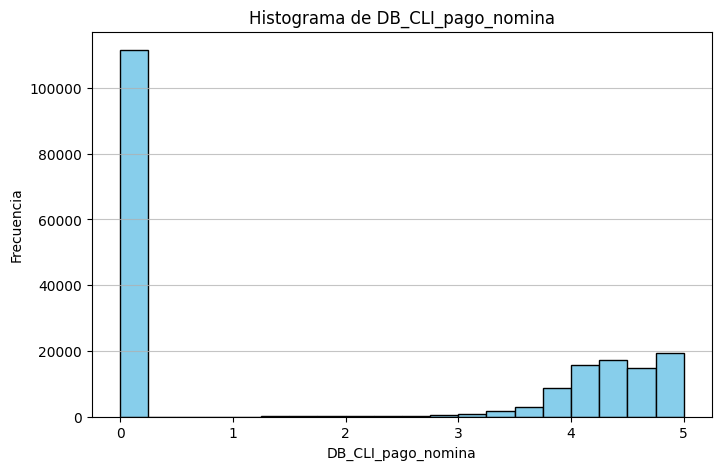

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio['DB_CLI_pago_nomina'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de DB_CLI_pago_nomina')
plt.xlabel('DB_CLI_pago_nomina')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


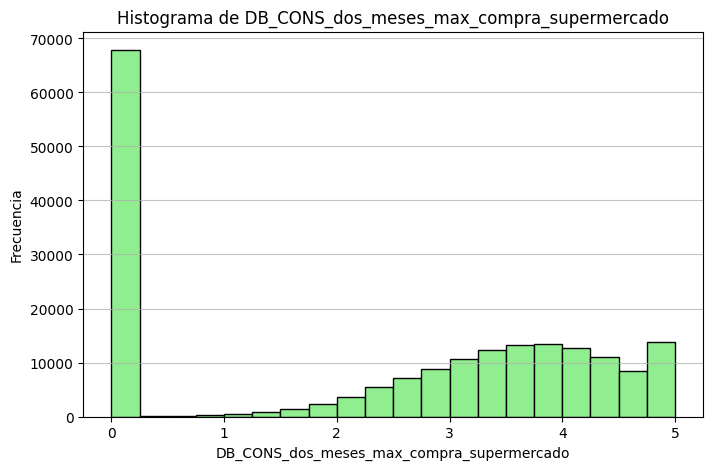

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio['DB_CONS_dos_meses_max_compra_supermercado'].dropna(), 
         bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma de DB_CONS_dos_meses_max_compra_supermercado')
plt.xlabel('DB_CONS_dos_meses_max_compra_supermercado')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


Ejemplo de distribución de variable seleccionada

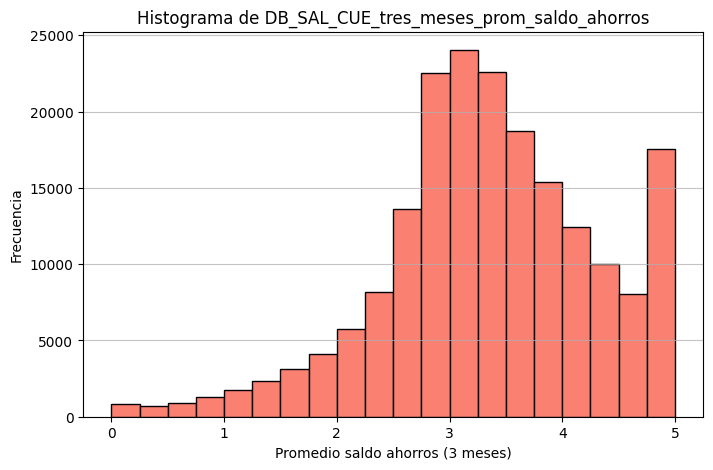

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio['DB_SAL_CUE_tres_meses_prom_saldo_ahorros'].dropna(), 
         bins=20, color='salmon', edgecolor='black')
plt.title('Histograma de DB_SAL_CUE_tres_meses_prom_saldo_ahorros')
plt.xlabel('Promedio saldo ahorros (3 meses)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [55]:
df_limpio['target'].value_counts()

target
0    172819
1     10254
5      5468
2      2491
3      2087
4       779
Name: count, dtype: int64

                                             target  DB_CLI_edad  \
target                                     1.000000    -0.087874   
DB_CLI_edad                               -0.087874     1.000000   
DB_CLI_ingreso                            -0.114448     0.279653   
DB_CLI_anios_exp                          -0.082384     0.066111   
DB_CLI_pago_nomina                        -0.078512    -0.002158   
...                                             ...          ...   
DB_CONS_tres_meses_prom_compra_salud      -0.073911     0.115267   
DB_CONS_tres_meses_max_compra_transporte  -0.056933     0.031174   
DB_CONS_tres_meses_min_compra_transporte  -0.043864     0.036359   
DB_CONS_tres_meses_sum_compra_transporte  -0.070687     0.033778   
DB_CONS_tres_meses_prom_compra_transporte -0.054655     0.037450   

                                           DB_CLI_ingreso  DB_CLI_anios_exp  \
target                                          -0.114448         -0.082384   
DB_CLI_edad              

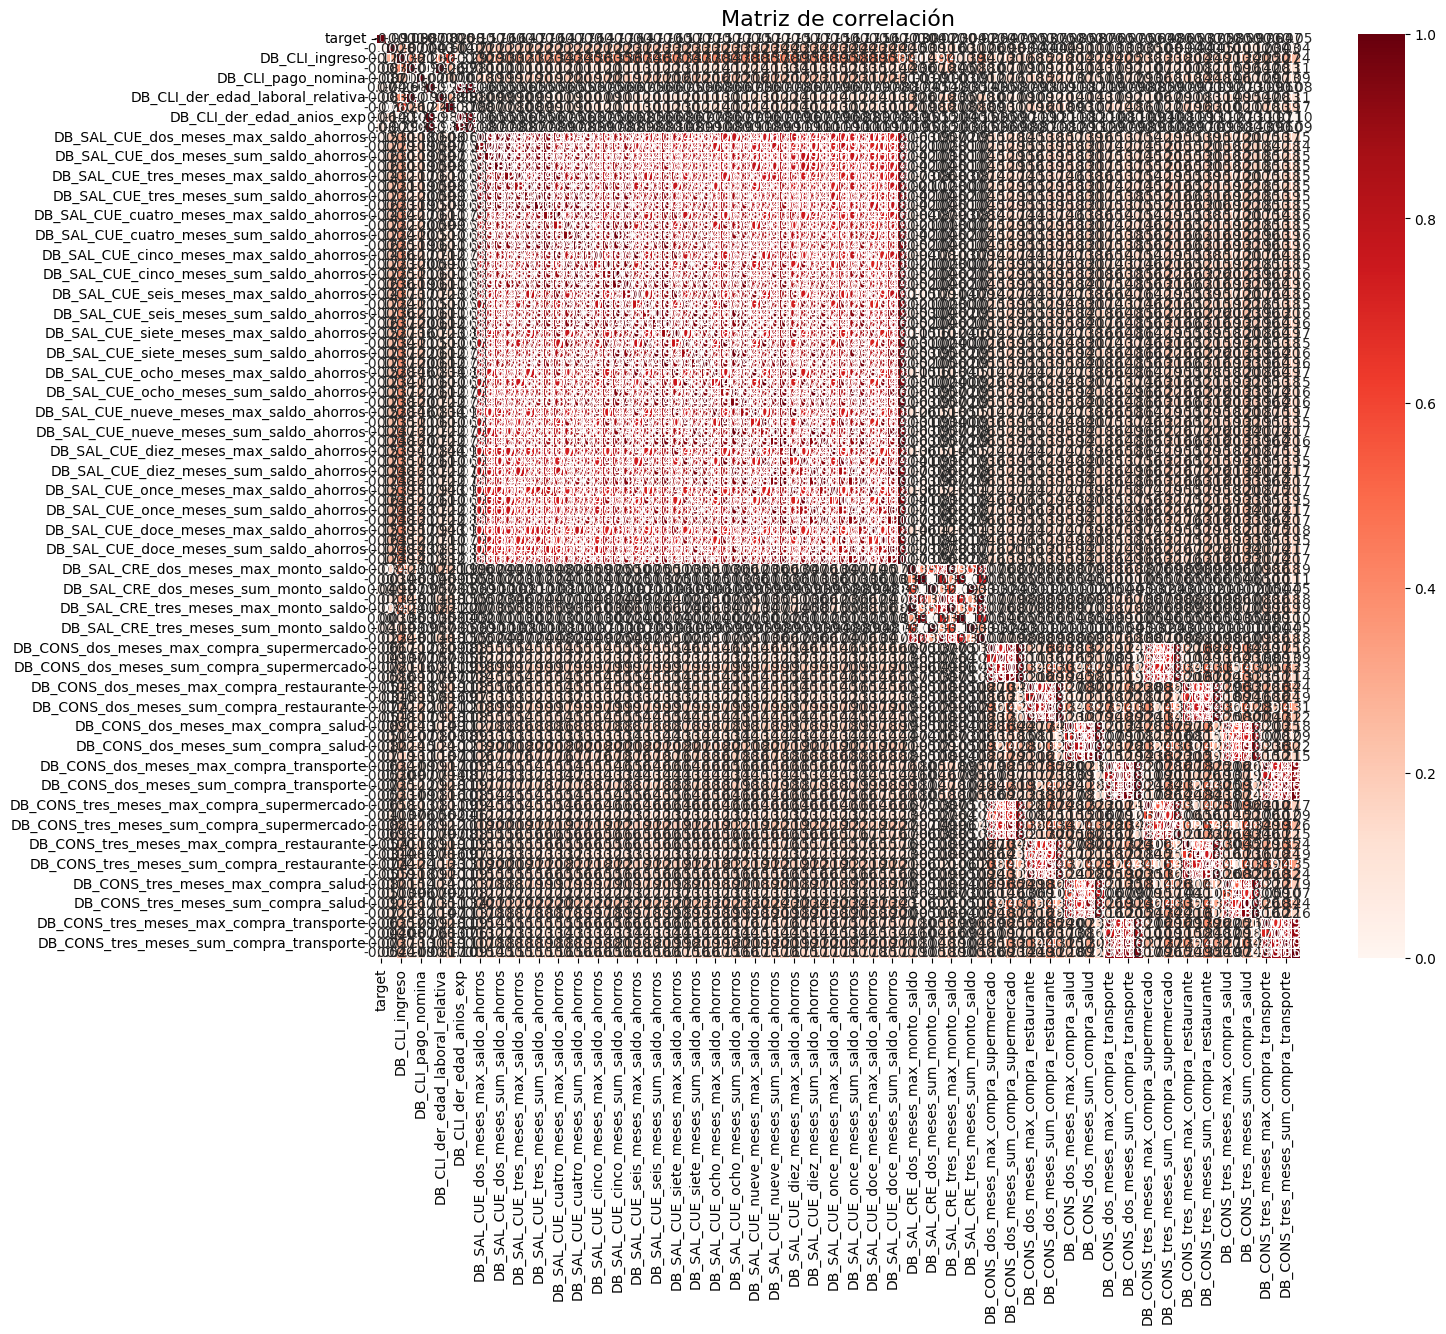

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_limpio ya existe y tiene solo variables numéricas (sin target)
# Calcular la matriz de correlación
corr_matrix = df_limpio.select_dtypes(include=['number']).corr()

# Mostrar la matriz de correlación en consola
print(corr_matrix)

# Mapa de calor de blanco a rojo
plt.figure(figsize=(15,12))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="Reds",        # De blanco (bajo) a rojo (alto)
    vmin=0,             # Opcional: empieza desde 0 en lugar de negativo
    vmax=1,             # Opcional: máximo 1
    linewidths=0.5,     # Líneas entre celdas
    square=True         # Celdas cuadradas
)
plt.title("Matriz de correlación", fontsize=16)
plt.show()


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar
grupo_vars = [
    'DB_SAL_CUE_dos_meses_max_saldo_ahorros',
    'DB_SAL_CUE_dos_meses_min_saldo_ahorros',
    'DB_SAL_CUE_dos_meses_sum_saldo_ahorros',
    'DB_SAL_CUE_dos_meses_prom_saldo_ahorros',
    'DB_SAL_CUE_tres_meses_max_saldo_ahorros',
    'DB_SAL_CUE_tres_meses_min_saldo_ahorros',
    'DB_SAL_CUE_tres_meses_sum_saldo_ahorros',
    'DB_SAL_CUE_tres_meses_prom_saldo_ahorros'
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                                   variable       AUC
6   DB_SAL_CUE_tres_meses_sum_saldo_ahorros  0.661987
5   DB_SAL_CUE_tres_meses_min_saldo_ahorros  0.660163
2    DB_SAL_CUE_dos_meses_sum_saldo_ahorros  0.659328
1    DB_SAL_CUE_dos_meses_min_saldo_ahorros  0.657744
3   DB_SAL_CUE_dos_meses_prom_saldo_ahorros  0.655960
7  DB_SAL_CUE_tres_meses_prom_saldo_ahorros  0.655770
0    DB_SAL_CUE_dos_meses_max_saldo_ahorros  0.639902
4   DB_SAL_CUE_tres_meses_max_saldo_ahorros  0.627981

Variable representativa: DB_SAL_CUE_tres_meses_sum_saldo_ahorros


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar (asegúrate que los nombres coincidan exactamente con tu DataFrame)
grupo_vars = [
    'DB_SAL_CRE_dos_meses_max_monto_saldo',
    'DB_SAL_CRE_dos_meses_min_monto_saldo',
    'DB_SAL_CRE_dos_meses_sum_monto_saldo',
    'DB_SAL_CRE_dos_meses_prom_monto_saldo',
    'DB_SAL_CRE_tres_meses_max_monto_saldo',
    'DB_SAL_CRE_tres_meses_min_monto_saldo',
    'DB_SAL_CRE_tres_meses_sum_monto_saldo',
    'DB_SAL_CRE_tres_meses_prom_monto_saldo'
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                                 variable       AUC
3   DB_SAL_CRE_dos_meses_prom_monto_saldo  0.561147
7  DB_SAL_CRE_tres_meses_prom_monto_saldo  0.560919
0    DB_SAL_CRE_dos_meses_max_monto_saldo  0.560134
4   DB_SAL_CRE_tres_meses_max_monto_saldo  0.558311
2    DB_SAL_CRE_dos_meses_sum_monto_saldo  0.540992
6   DB_SAL_CRE_tres_meses_sum_monto_saldo  0.538918
1    DB_SAL_CRE_dos_meses_min_monto_saldo  0.534898
5   DB_SAL_CRE_tres_meses_min_monto_saldo  0.533560

Variable representativa: DB_SAL_CRE_dos_meses_prom_monto_saldo


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar (compras en supermercado)
grupo_vars = [
    'DB_CONS_dos_meses_max_compra_supermercado',
    'DB_CONS_dos_meses_min_compra_supermercado',
    'DB_CONS_dos_meses_sum_compra_supermercado',
    'DB_CONS_dos_meses_prom_compra_supermercado'
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                                     variable       AUC
2   DB_CONS_dos_meses_sum_compra_supermercado  0.589178
0   DB_CONS_dos_meses_max_compra_supermercado  0.581519
3  DB_CONS_dos_meses_prom_compra_supermercado  0.565299
1   DB_CONS_dos_meses_min_compra_supermercado  0.549462

Variable representativa: DB_CONS_dos_meses_sum_compra_supermercado


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar: compras salud
grupo_vars = [
    'DB_CONS_dos_meses_max_compra_salud',
    'DB_CONS_dos_meses_min_compra_salud',
    'DB_CONS_dos_meses_sum_compra_salud',
    'DB_CONS_dos_meses_prom_compra_salud'
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                              variable       AUC
2   DB_CONS_dos_meses_sum_compra_salud  0.581843
0   DB_CONS_dos_meses_max_compra_salud  0.578227
3  DB_CONS_dos_meses_prom_compra_salud  0.567715
1   DB_CONS_dos_meses_min_compra_salud  0.552881

Variable representativa: DB_CONS_dos_meses_sum_compra_salud


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar
grupo_vars = [
    'DB_CONS_dos_meses_max_compra_transporte',
    'DB_CONS_dos_meses_min_compra_transporte',
    'DB_CONS_dos_meses_sum_compra_transporte',
    'DB_CONS_dos_meses_prom_compra_transporte'
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                                   variable       AUC
2   DB_CONS_dos_meses_sum_compra_transporte  0.566796
0   DB_CONS_dos_meses_max_compra_transporte  0.563904
1   DB_CONS_dos_meses_min_compra_transporte  0.555482
3  DB_CONS_dos_meses_prom_compra_transporte  0.555212

Variable representativa: DB_CONS_dos_meses_sum_compra_transporte


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar
grupo_vars = [
    'DB_CONS_tres_meses_max_compra_supermercado',
    'DB_CONS_tres_meses_min_compra_supermercado',
    'DB_CONS_tres_meses_sum_compra_supermercado',
    'DB_CONS_tres_meses_prom_compra_supermercado'
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                                      variable       AUC
2   DB_CONS_tres_meses_sum_compra_supermercado  0.599263
0   DB_CONS_tres_meses_max_compra_supermercado  0.587261
3  DB_CONS_tres_meses_prom_compra_supermercado  0.569733
1   DB_CONS_tres_meses_min_compra_supermercado  0.534996

Variable representativa: DB_CONS_tres_meses_sum_compra_supermercado


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar (compras en restaurante)
grupo_vars = [
    'DB_CONS_tres_meses_max_compra_restaurante',
    'DB_CONS_tres_meses_min_compra_restaurante',
    'DB_CONS_tres_meses_sum_compra_restaurante',
    'DB_CONS_tres_meses_prom_compra_restaurante'  # corregí el espacio en tu nombre
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                                     variable       AUC
2   DB_CONS_tres_meses_sum_compra_restaurante  0.607269
0   DB_CONS_tres_meses_max_compra_restaurante  0.597995
3  DB_CONS_tres_meses_prom_compra_restaurante  0.576503
1   DB_CONS_tres_meses_min_compra_restaurante  0.550306

Variable representativa: DB_CONS_tres_meses_sum_compra_restaurante


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar
grupo_vars = [
    'DB_CONS_tres_meses_max_compra_salud',
    'DB_CONS_tres_meses_min_compra_salud',
    'DB_CONS_tres_meses_sum_compra_salud',
    'DB_CONS_tres_meses_prom_compra_salud'  # asegúrate de que el nombre sea exacto
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                               variable       AUC
2   DB_CONS_tres_meses_sum_compra_salud  0.597661
0   DB_CONS_tres_meses_max_compra_salud  0.591559
3  DB_CONS_tres_meses_prom_compra_salud  0.580424
1   DB_CONS_tres_meses_min_compra_salud  0.532464

Variable representativa: DB_CONS_tres_meses_sum_compra_salud


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# Variables a analizar
grupo_vars = [
    'DB_CONS_tres_meses_max_compra_transporte',
    'DB_CONS_tres_meses_min_compra_transporte',
    'DB_CONS_tres_meses_sum_compra_transporte',
    'DB_CONS_tres_meses_prom_compra_transporte'
]

target = 'target'  # reemplaza con tu target real

resultados = []

for var in grupo_vars:
    X = df_limpio[[var]]
    y = df_limpio[target]

    # Modelo univariado con OneVsRest
    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)  # probabilidades para todas las clases

    # Calcular AUC multiclase
    auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    resultados.append((var, auc))

# DataFrame con resultados
resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
print(resultados_df)

# Variable representativa
var_representativa = resultados_df.iloc[0]['variable']
print("\nVariable representativa:", var_representativa)


                                    variable       AUC
2   DB_CONS_tres_meses_sum_compra_transporte  0.577628
0   DB_CONS_tres_meses_max_compra_transporte  0.574292
3  DB_CONS_tres_meses_prom_compra_transporte  0.563280
1   DB_CONS_tres_meses_min_compra_transporte  0.538616

Variable representativa: DB_CONS_tres_meses_sum_compra_transporte


In [66]:
df_limpio['target'].value_counts()

target
0    172819
1     10254
5      5468
2      2491
3      2087
4       779
Name: count, dtype: int64

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # O RandomForestRegressor si tu target es continuo
from sklearn.metrics import accuracy_score, classification_report

# Variables que usarás
features = [
    'DB_CLI_edad',
    'DB_CLI_ingreso',
    'DB_CLI_anios_exp',
    'DB_CLI_pago_nomina',
    'DB_CLI_der_ingreso_por_anio_exp',
    'DB_SAL_CUE_tres_meses_min_saldo_ahorros',
    'DB_SAL_CRE_tres_meses_max_monto_saldo',
    'DB_CONS_dos_meses_sum_compra_supermercado',
    'DB_CONS_dos_meses_sum_compra_salud',
    'DB_CONS_dos_meses_sum_compra_transporte',
    'DB_CONS_tres_meses_sum_compra_supermercado',
    'DB_CONS_tres_meses_sum_compra_restaurante',
    'DB_CONS_tres_meses_sum_compra_salud',
    'DB_CONS_tres_meses_sum_compra_transporte'
]

# Separar X e y
X = df_limpio[features]
y = df_limpio['target']

# Dividir en train (70%) y temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dividir temp en validation (20%) y test (10%)
# Nota: validation = 20/30 = 2/3 del temp, test = 1/3 del temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluar en validation
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluar en test
y_test_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Train: (135728, 14), Validation: (38780, 14), Test: (19390, 14)
Validation Accuracy: 0.8911294481691594
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     34564
           1       0.29      0.00      0.01      2051
           2       0.00      0.00      0.00       498
           3       0.00      0.00      0.00       417
           4       0.00      0.00      0.00       156
           5       0.50      0.00      0.01      1094

    accuracy                           0.89     38780
   macro avg       0.28      0.17      0.16     38780
weighted avg       0.82      0.89      0.84     38780



c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Test Accuracy: 0.8912841670964414
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17282
           1       0.33      0.00      0.00      1025
           2       1.00      0.00      0.01       249
           3       0.00      0.00      0.00       209
           4       0.00      0.00      0.00        78
           5       0.50      0.00      0.00       547

    accuracy                           0.89     19390
   macro avg       0.45      0.17      0.16     19390
weighted avg       0.84      0.89      0.84     19390



c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

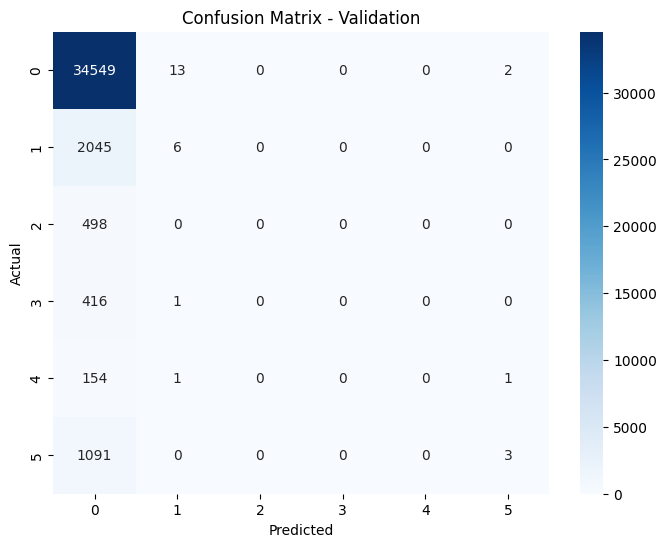

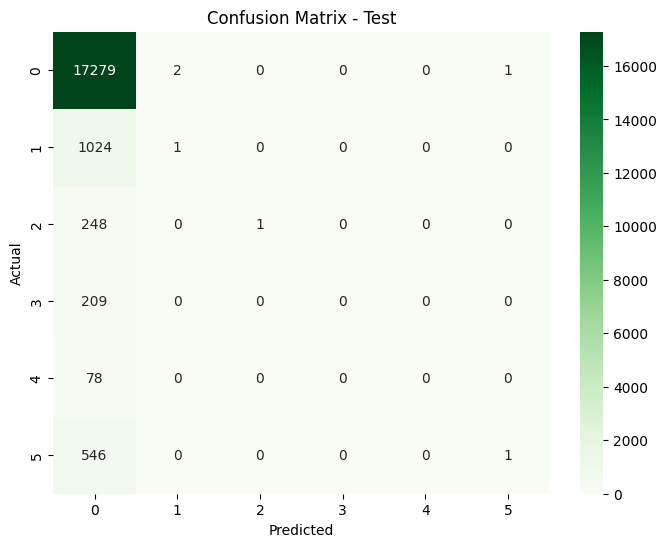

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión para validation
cm_val = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation')
plt.show()

# Matriz de confusión para test
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Variables que usarás
features = [
    'DB_CLI_edad',
    'DB_CLI_ingreso',
    'DB_CLI_anios_exp',
    'DB_CLI_pago_nomina',
    'DB_CLI_der_ingreso_por_anio_exp',
    'DB_SAL_CUE_tres_meses_min_saldo_ahorros',
    'DB_SAL_CRE_tres_meses_max_monto_saldo',
    'DB_CONS_dos_meses_sum_compra_supermercado',
    'DB_CONS_dos_meses_sum_compra_salud',
    'DB_CONS_dos_meses_sum_compra_transporte',
    'DB_CONS_tres_meses_sum_compra_supermercado',
    'DB_CONS_tres_meses_sum_compra_restaurante',
    'DB_CONS_tres_meses_sum_compra_salud',
    'DB_CONS_tres_meses_sum_compra_transporte'
]

# Separar X e y
X = df_limpio[features]
y = df_limpio['target']

# Dividir en train (70%) y temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dividir temp en validation (20%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# Entrenar Random Forest con balance de clases
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # ← Aquí aplicamos balance
)
rf.fit(X_train, y_train)

# Evaluar en validation
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluar en test
y_test_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Train: (135728, 14), Validation: (38780, 14), Test: (19390, 14)
Validation Accuracy: 0.8912325941206808
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     34564
           1       0.29      0.00      0.00      2051
           2       0.00      0.00      0.00       498
           3       0.00      0.00      0.00       417
           4       0.00      0.00      0.00       156
           5       0.00      0.00      0.00      1094

    accuracy                           0.89     38780
   macro avg       0.20      0.17      0.16     38780
weighted avg       0.81      0.89      0.84     38780



c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Test Accuracy: 0.8912841670964414
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17282
           1       0.00      0.00      0.00      1025
           2       1.00      0.00      0.01       249
           3       0.00      0.00      0.00       209
           4       0.00      0.00      0.00        78
           5       0.00      0.00      0.00       547

    accuracy                           0.89     19390
   macro avg       0.32      0.17      0.16     19390
weighted avg       0.81      0.89      0.84     19390



c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler  # Librería para undersampling

# Variables que usarás
features = [
    'DB_CLI_edad',
    'DB_CLI_ingreso',
    'DB_CLI_anios_exp',
    'DB_CLI_pago_nomina',
    'DB_CLI_der_ingreso_por_anio_exp',
    'DB_SAL_CUE_tres_meses_min_saldo_ahorros',
    'DB_SAL_CRE_tres_meses_max_monto_saldo',
    'DB_CONS_dos_meses_sum_compra_supermercado',
    'DB_CONS_dos_meses_sum_compra_salud',
    'DB_CONS_dos_meses_sum_compra_transporte',
    'DB_CONS_tres_meses_sum_compra_supermercado',
    'DB_CONS_tres_meses_sum_compra_restaurante',
    'DB_CONS_tres_meses_sum_compra_salud',
    'DB_CONS_tres_meses_sum_compra_transporte'
]

# Separar X e y
X = df_limpio[features]
y = df_limpio['target']

# Dividir en train (70%) y temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dividir temp en validation (20%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# === Aplicar undersampling solo al conjunto de entrenamiento ===
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print(f"Train balanceado: {X_train_res.shape}")
print("Clases distribuidas después de undersampling:")
print(pd.Series(y_train_res).value_counts())

# Entrenar Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train_res, y_train_res)

# Evaluar en validation
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluar en test
y_test_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Train: (135728, 14), Validation: (38780, 14), Test: (19390, 14)
Train balanceado: (3270, 14)
Clases distribuidas después de undersampling:
target
0    545
1    545
2    545
3    545
4    545
5    545
Name: count, dtype: int64
Validation Accuracy: 0.43295513151108816
              precision    recall  f1-score   support

           0       0.96      0.44      0.61     34564
           1       0.12      0.37      0.18      2051
           2       0.05      0.48      0.10       498
           3       0.03      0.37      0.05       417
           4       0.02      0.29      0.03       156
           5       0.08      0.26      0.12      1094

    accuracy                           0.43     38780
   macro avg       0.21      0.37      0.18     38780
weighted avg       0.87      0.43      0.56     38780

Test Accuracy: 0.43785456420835484
              precision    recall  f1-score   support

           0       0.97      0.45      0.61     17282
           1       0.13      0.38      0.19   

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN  # Combina oversampling (SMOTE) y undersampling (ENN)

# Variables a usar
features = [
    'DB_CLI_edad',
    'DB_CLI_ingreso',
    'DB_CLI_anios_exp',
    'DB_CLI_pago_nomina',
    'DB_CLI_der_ingreso_por_anio_exp',
    'DB_SAL_CUE_tres_meses_min_saldo_ahorros',
    'DB_SAL_CRE_tres_meses_max_monto_saldo',
    'DB_CONS_dos_meses_sum_compra_supermercado',
    'DB_CONS_dos_meses_sum_compra_salud',
    'DB_CONS_dos_meses_sum_compra_transporte',
    'DB_CONS_tres_meses_sum_compra_supermercado',
    'DB_CONS_tres_meses_sum_compra_restaurante',
    'DB_CONS_tres_meses_sum_compra_salud',
    'DB_CONS_tres_meses_sum_compra_transporte'
]

# Separar X e y
X = df_limpio[features]
y = df_limpio['target']

# Dividir en train (70%) y temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dividir temp en validation (20%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# === Aplicar combinación oversampling + undersampling suave ===
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

print(f"Train balanceado: {X_train_res.shape}")
print("Clases después de SMOTE+ENN:")
print(pd.Series(y_train_res).value_counts())

# === Entrenar Random Forest con class_weight='balanced' ===
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_res, y_train_res)

# === Evaluación en validation ===
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Matriz de confusión:\n", confusion_matrix(y_val, y_val_pred))

# === Evaluación en test ===
y_test_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred))


Train: (135728, 14), Validation: (38780, 14), Test: (19390, 14)
Train balanceado: (656140, 14)
Clases después de SMOTE+ENN:
target
4    120889
3    120249
2    120054
5    117514
1    116107
0     61327
Name: count, dtype: int64
Validation Accuracy: 0.5842186694172253
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     34564
           1       0.13      0.55      0.21      2051
           2       0.07      0.35      0.12       498
           3       0.05      0.18      0.08       417
           4       0.02      0.05      0.03       156
           5       0.09      0.33      0.14      1094

    accuracy                           0.58     38780
   macro avg       0.22      0.34      0.22     38780
weighted avg       0.86      0.58      0.68     38780

Matriz de confusión:
 [[20921  6867  1964  1208   358  3246]
 [  474  1121    90    86    34   246]
 [   98    97   174     7    18   104]
 [  128   149    23    74     5    38]
 [   35   

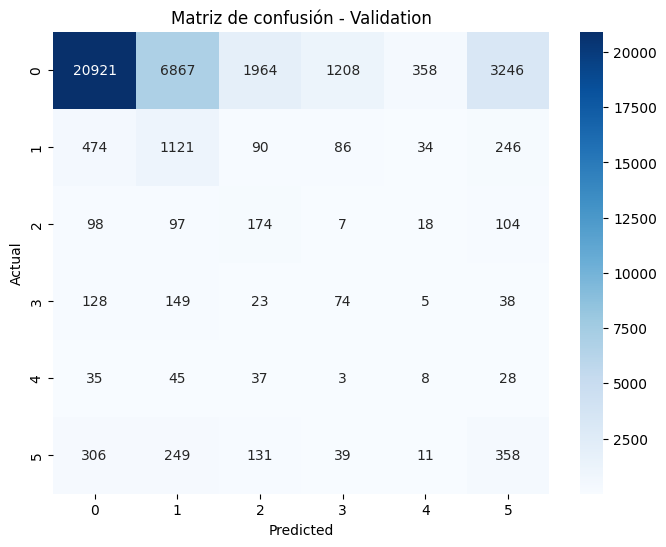

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm_val = confusion_matrix(y_val, y_val_pred)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Validation')
plt.show()
